In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1" # for hera
import matplotlib.pyplot as plt
import sys,time
from numpy import pi
import numpy as np
sys.path.append('../')
import rcwa
from fft_funs import get_conv

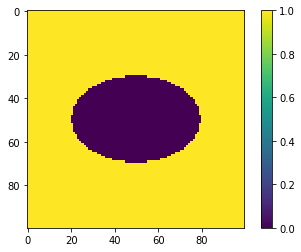

In [2]:
# discretization for patterend layer
Nx = 100
Ny = 100
r2 = 0.3
r1 = 0.2
# let's setup a cylinder grid, and here we plot eps_patterend to double check

dof = np.ones((Nx,Ny))
x0 = np.linspace(0,1.,Nx)
y0 = np.linspace(0,1.,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5)**2/r1**2+(y-.5)**2/r2**2<1
dof[sphere]=0
plt.figure();
plt.imshow(dof)
plt.colorbar()
plt.show()

In [3]:
reload(rcwa)
nG = 101
# lattice vector
Lx = .1
Ly = .1
L1 = [Lx,0.]
L2 = [0.,Ly]

# frequency and angles
freq = 0.5
theta = 0.
phi = 0.

# now consider three layers: vacuum + patterned + vacuum
epsuniform1 = 1.
epsuniform2 = 1.
thick1 = 1.
thick2 = 0.25
thick3 = 1.

# for patterned layer, eps = epsbkg + dof * epsdiff
epsbkg = 1.
epsdiff = 11.299048999999991 + 0.000000669787663*1j

# setup RCWA
obj = rcwa.RCWA_obj(nG,L1,L2,freq,theta,phi)
obj.Add_LayerUniform(thick1,epsuniform1)
obj.Add_LayerGrid(thick2,epsdiff,epsbkg,Nx,Ny)
obj.Add_LayerUniform(thick3,epsuniform2)
obj.Init_Setup(Gmethod=0)
# add DOF to rcwa
obj.GridLayer_getDOF(dof.flatten())

('Total nG = ', 101)


In [7]:
p_amp = 0.
s_amp = 1.
p_phase = 0.
s_phase = 0.

obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0, direction = 'backward')
R,T= obj.RT_Solve(normalize=1)
# this is merely reflected and transmitted power
# To get the reflection and transmission coefficient, some normalization is needed
print("R=",R,", T=",T,", Abs=",1-R-T)

('R=', 0.4522902289075352, ', T=', 0.5477096721030941, ', Abs=', 9.898937070040859e-08)


In [6]:
p_amp = 0.
s_amp = 1.
p_phase = 0.
s_phase = 0.

obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0, direction = 'forward')
R,T= obj.RT_Solve(normalize=1)
# this is merely reflected and transmitted power
# To get the reflection and transmission coefficient, some normalization is needed
print("R=",R,", T=",T,", Abs=",1-R-T)

('R=', 0.4522902289075351, ', T=', 0.5477096721030937, ', Abs=', 9.89893711444978e-08)


In [8]:
epimag = np.imag(epsdiff)*dof
Mv = get_conv(1./Nx/Ny,epimag,obj.G)
val = obj.Volume_integral(1,Mv,Mv,Mv,normalize=0)
print(np.real(val*obj.omega))

9.904628244805755e-08
